Please ensure that you have all necessary packages before running the cell below. You should already have everything necessary if you were able to run the previous tutorial.

In [2]:
%pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 83.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
from matplotlib import pyplot as plt
import contextily as ctx
import warnings
warnings.filterwarnings("ignore")

In this tutorial, we'd like to create an O-D matrix of the CitiBike trips from one neighborhood to another. We'll focus on the following two neighborhoods: BK09 (Brooklyn Heights) and BK38 (DUMBO)

In [4]:
#load trip data
cb_trips = pd.read_csv('https://raw.githubusercontent.com/Zoey4222/python-geo-lab/refs/heads/main/data/Lab3_CitiBikeData.csv', low_memory=False)
cb_trips

,ID,tripduration,startstationid,startstationname,startstationlatitude,startstationlongitude,endstationid,endstationname,endstationlatitude,endstationlongitude,bikeid,gender
0,1,146,237,E 11 St & 2 Ave,40.730473,-73.986724,438,St Marks Pl & 1 Ave,40.727791,-73.985649,15253,1
1,2,1401,302,Avenue D & E 3 St,40.720828,-73.977932,463,9 Ave & W 16 St,40.742065,-74.004432,16280,2
2,3,353,2006,Central Park S & 6 Ave,40.765909,-73.976342,499,Broadway & W 60 St,40.769155,-73.981918,16390,1
3,4,877,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,295,Pike St & E Broadway,40.714067,-73.992939,14869,2
4,5,277,317,E 6 St & Avenue B,40.724537,-73.981854,411,E 6 St & Avenue D,40.722281,-73.976687,20110,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8968,8969,345,531,Forsyth St & Broome St,40.718939,-73.992663,340,Madison St & Clinton St,40.712690,-73.987763,19082,2
8969,8970,295,537,Lexington Ave & E 24 St,40.740259,-73.984092,297,E 15 St & 3 Ave,40.734232,-73.986923,19771,1
8970,8971,1151,477,W 41 St & 8 Ave,40.756405,-73.990026,369,Washington Pl & 6 Ave,40.732241,-74.000264,18250,0
8971,8972,889,236,St Marks Pl & 2 Ave,40.728419,-73.987140,494,W 26 St & 8 Ave,40.747348,-73.997236,21591,1


In [5]:
#create one point layer based on start location
trips_start = gpd.GeoDataFrame(cb_trips, geometry=gpd.points_from_xy(cb_trips['startstationlongitude'], cb_trips['startstationlatitude']), crs='EPSG:4326')

In [6]:
#create another point layer bsed on end location
trips_end = gpd.GeoDataFrame(cb_trips, geometry=gpd.points_from_xy(cb_trips['endstationlongitude'], cb_trips['endstationlatitude']), crs='EPSG:4326')

In [7]:
#load nta file
nta = gpd.read_file('https://raw.githubusercontent.com/Zoey4222/python-geo-lab/main/data/Neighborhood%20Tabulation%20Areas/geo_export_bb0720e0-e8ac-4320-8198-4d92d6d7ce2f.shp').to_crs(4326)
nta

,ntacode,ntaname,boro_name,shape_leng,county_fip,shape_area,boro_code,geometry
0,BK88,Borough Park,Brooklyn,39247.228028,047,5.400502e+07,3.0,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."
1,QN52,East Flushing,Queens,25843.364934,081,2.945438e+07,4.0,"POLYGON ((-73.79493 40.7578, -73.79475 40.7556..."
2,QN48,Auburndale,Queens,32446.878764,081,3.416422e+07,4.0,"POLYGON ((-73.77574 40.74333, -73.7758 40.7433..."
3,QN51,Murray Hill,Queens,33266.904732,081,5.248828e+07,4.0,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
4,QN27,East Elmhurst,Queens,19816.712116,081,1.972685e+07,4.0,"POLYGON ((-73.8611 40.76366, -73.85993 40.7622..."
...,...,...,...,...,...,...,...,...
190,QN53,Woodhaven,Queens,28067.663701,081,3.700043e+07,4.0,"POLYGON ((-73.84914 40.69828, -73.84948 40.698..."
191,BK82,East New York,Brooklyn,88701.714306,047,1.170545e+08,3.0,"POLYGON ((-73.86114 40.67433, -73.86107 40.674..."
192,BK83,Cypress Hills-City Line,Brooklyn,35572.262851,047,2.760617e+07,3.0,"POLYGON ((-73.86335 40.67935, -73.86331 40.679..."
193,MN03,Central Harlem North-Polo Grounds,Manhattan,28110.199230,061,2.540555e+07,1.0,"POLYGON ((-73.93383 40.81949, -73.93412 40.819..."


In [8]:
#spatial join start to nta
trips_start_nta = gpd.sjoin(trips_start, nta)
#sanity check
print(len(trips_start_nta))
print(sum(trips_start_nta.isna().sum()))

8973
0


In [9]:
#spatial join end to nta
trips_end_nta = gpd.sjoin(trips_end, nta)
#sanity check
print(len(trips_end_nta))
print(sum(trips_end_nta.isna().sum()))

8973
0


In [10]:
trips_nta_merged = trips_start_nta[['ID', 'ntacode']].merge(trips_end_nta[['ID', 'ntacode']], on='ID')
trips_nta_merged.rename(columns={'ntacode_x':'start_nta', 'ntacode_y':'end_nta'}, inplace=True)
trips_nta_merged.head()

,ID,start_nta,end_nta
0,1,MN22,MN22
1,2,MN28,MN13
2,3,MN99,MN14
3,4,MN23,MN27
4,5,MN22,MN28


In [11]:
#od: bk09-bk09
len(trips_nta_merged.loc[(trips_nta_merged['start_nta']=='BK09') & (trips_nta_merged['end_nta']=='BK09')])

14

In [12]:
#od: bk09-bk38
len(trips_nta_merged.loc[(trips_nta_merged['start_nta']=='BK09') & (trips_nta_merged['end_nta']=='BK38')])

18

In [13]:
#od: bk38-bk09
len(trips_nta_merged.loc[(trips_nta_merged['start_nta']=='BK38') & (trips_nta_merged['end_nta']=='BK09')])

16

In [14]:
#od: bk38-bk38
len(trips_nta_merged.loc[(trips_nta_merged['start_nta']=='BK38') & (trips_nta_merged['end_nta']=='BK38')])

56

The four output cells above show the equivalence of the OD matrix obtained using ArcGIS

The following portion focuses on creating dissolved zones.

In [15]:
#zone1: MN23 and MN24
zone1 = nta.loc[nta['ntacode'].isin(['MN23', 'MN24'])]
#zone2: MN27 and MN 22
zone2 = nta.loc[nta['ntacode'].isin(['MN27', 'MN22'])]

In [16]:
#now dissolve
zone1_dissolved = zone1.dissolve()
zone2_dissolved = zone2.dissolve()

Text(0.5, 1.0, 'Dissolved')

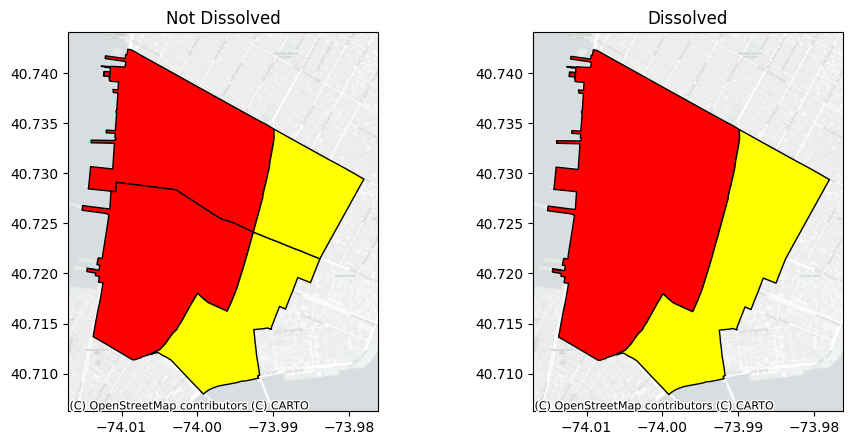

In [17]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, gridspec_kw={'wspace':0.5})
#separate
zone1.plot(ax=ax[0], legend=True, color='red', edgecolor='black')
zone2.plot(ax=ax[0], legend=True, color='yellow', edgecolor='black')
ctx.add_basemap(ax=ax[0], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[0].set_title('Not Dissolved')
#dissolved
zone1_dissolved.plot(ax=ax[1], legend=True, color='red', edgecolor='black')
zone2_dissolved.plot(ax=ax[1], legend=True, color='yellow', edgecolor='black')
ctx.add_basemap(ax=ax[1], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[1].set_title('Dissolved')

As seen in the maps above, the dissolved version "merged" the smaller polygons.

Our next step is to select the bike lanes in zone1_dissolved.

In [20]:
#load bike lanes
url = "https://github.com/Zoey4222/python-geo-lab/raw/main/data/Lab3_Bike_Lane/Bike_Lanes.shp"


bike_lanes = gpd.read_file(url).to_crs(epsg=4326)

print(bike_lanes.shape)
bike_lanes.head()

(16672, 18)


,allclasses,bikedir,boro,comments,facilitycl,fromstreet,ft_facilit,date_instd,time_instd,lanecount,date_modda,time_modda,onoffst,segment_id,street,tf_facilit,tostreet,geometry
0,I,L,1.0,None,I,W 16 ST,None,2008-09-25,00:00:00.000,1.0,2008/09/25,00:00:00.000,ON,33547,9 AV,Protected Path,W 31 ST,"LINESTRING (-74.0004 40.74777, -73.99994 40.7484)"
1,II,R,3.0,None,II,DEAN ST,Standard,1980-07-01,00:00:00.000,1.0,1980/07/01,00:00:00.000,ON,22630,3 AV,None,15 ST,"LINESTRING (-73.98748 40.67571, -73.988 40.67508)"
2,III,L,3.0,downgrade to shared,III,TILLARY ST,None,2006-06-01,00:00:00.000,1.0,2017/07/01,00:00:00.000,ON,299123,ADAMS ST,Sharrows,SANDS ST,"LINESTRING (-73.9885 40.69736, -73.98856 40.69..."
3,III,R,1.0,None,III,5 AV,Sharrows,2012-09-12,00:00:00.000,1.0,2012/09/12,00:00:00.000,ON,34170,W 39 ST,None,8 AV,"LINESTRING (-73.98227 40.75158, -73.98549 40.7..."
4,II,L,3.0,None,II,FLUSHING AV,None,2003-06-01,00:00:00.000,1.0,2003/06/01,00:00:00.000,ON,43043,THROOP AV,Standard,FULTON ST,"LINESTRING (-73.94149 40.68576, -73.94135 40.6..."


In GeoPandas, we can change the "predicate" argument in .sjoin to achieve similar goals to the different options in select by location. `predicate` must be one of {'overlaps', 'contains', 'crosses', None, 'touches', 'contains_properly', 'covers', 'covered_by', 'within', 'intersects'}.

In [21]:
lanes_intersects = gpd.sjoin(bike_lanes, zone1_dissolved, predicate='intersects')
lanes_within = gpd.sjoin(bike_lanes, zone1_dissolved, predicate='within')

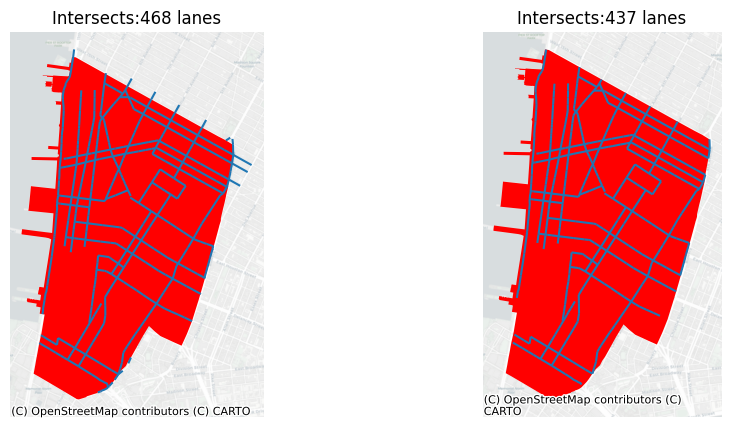

In [22]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, gridspec_kw={'wspace':0.5})
#intersects
lanes_intersects.plot(ax=ax[0], legend=True)
zone1_dissolved.plot(ax=ax[0], legend=True, color='red')
ctx.add_basemap(ax=ax[0], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[0].set_title(f'Intersects:{len(lanes_intersects)} lanes')
ax[0].set_axis_off()
#within
lanes_within.plot(ax=ax[1], legend=True)
zone1_dissolved.plot(ax=ax[1], legend=True, color='red')
ctx.add_basemap(ax=ax[1], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[1].set_title(f'Intersects:{len(lanes_within)} lanes')
ax[1].set_axis_off()

While the numbers do not exactly match the ones we obtain from ArcGIS, we still obtained more lanes in the selected zone using "intersects" compared to "within."

Since the lanes using the "intersects" option were not completely within the boundary of the dissolved zone1, we'll clip these lanes.

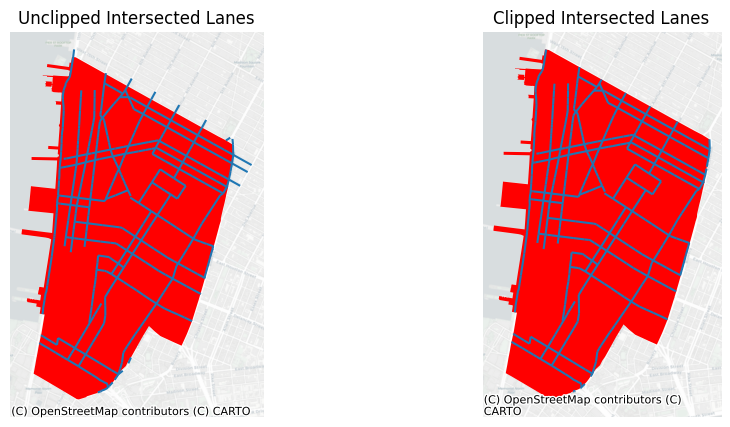

In [23]:
lanes_intersects_clipped = gpd.clip(lanes_intersects, zone1_dissolved)

#plot
fig, ax = plt.subplots(figsize=(10,5), ncols=2, gridspec_kw={'wspace':0.5})
#unclipped
lanes_intersects.plot(ax=ax[0], legend=True)
zone1_dissolved.plot(ax=ax[0], legend=True, color='red')
ctx.add_basemap(ax=ax[0], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[0].set_title('Unclipped Intersected Lanes')
ax[0].set_axis_off()
#clipped
lanes_intersects_clipped.plot(ax=ax[1], legend=True)
zone1_dissolved.plot(ax=ax[1], legend=True, color='red')
ctx.add_basemap(ax=ax[1], crs=4326, source=ctx.providers.CartoDB.Positron,alpha=0.9)
ax[1].set_title('Clipped Intersected Lanes')
ax[1].set_axis_off()

Our final step is to find the total number of trips started from zone1_dissolved.

In [24]:
len(gpd.sjoin(trips_start, zone1_dissolved))

1680

We obtained the same total number of trip counts as we did in ArcGIS.